In [2]:
# encoding: utf-8

from IPython.display import Image
from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})
import numpy as np

# Powtórzenie:

* Co to jest ciąg uczący?

* Co to jest hipoteza?

* Co to jest funkcja kosztu?

* Co to jest funkcja wiarygodności?

# Wstęp
* W tym wykładzie zajmiemy się problemem konstrukcji Uogulnionych Modeli Liniowych (ang. ''generalized linear models'' - GLM). 
* Metodologia ta pozwala objąć w jednym formaliźmie zarówno problemy regresji jak i klasyfikacji. 
* W pewnym sensie klasyfikacja jest podobna do regresji, z tą różnicą, że zmienne które chcemy przewidywać mogą przybierać tylko niewielką liczbę dyskretnych wartości. 
*  Zaczniemy od problemu klasyfikacji binarnej, czyli takiej, w której wejściom mamy przypisywać jedną z dwóch klas, np. oznaczonych 0 i 1. 

# Regresja logistyczna
## Problem 
* Dane należą do jednej z dwóch klas (tzn. `y` w ciągu uczącym jest 0 lub 1.)

In [3]:
x = np.arange(-3,3,0.5)
y = np.zeros(len(x))
y[6:] = 1
print(x)
print(y)

[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


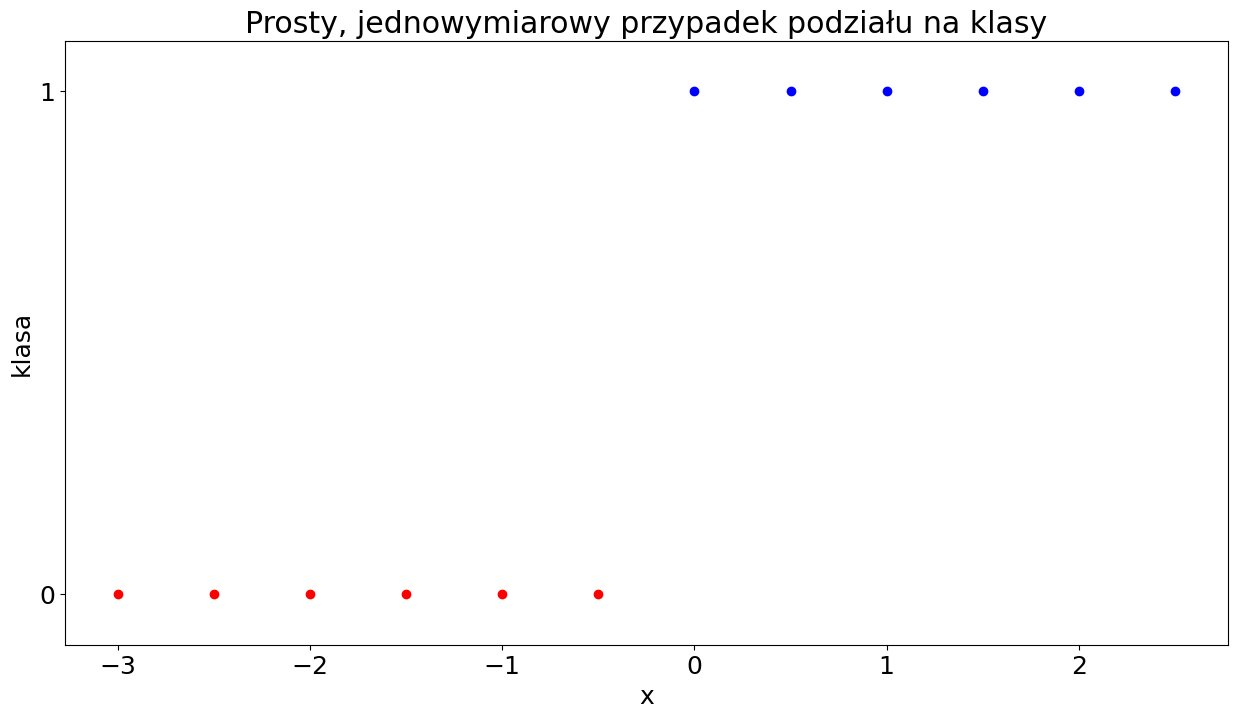

In [4]:
plt.plot(x[y==0],y[y==0],'ro')
plt.plot(x[y==1],y[y==1],'bo')
plt.ylim((-0.1, 1.1))
plt.xlabel("x")
plt.ylabel("klasa")
plt.title("Prosty, jednowymiarowy przypadek podziału na klasy") 
plt.yticks([0,1])
plt.show()

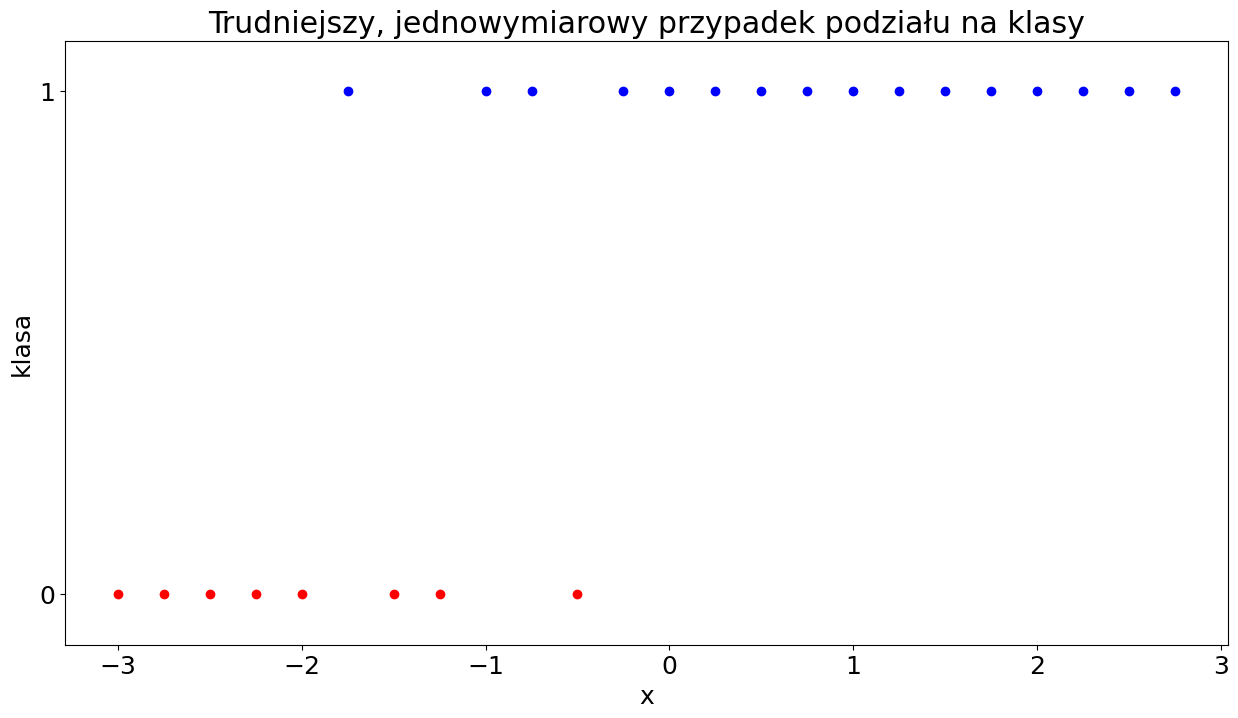

In [5]:
x = np.arange(-3,3,0.25)
y = np.zeros(len(x))
y[8:] =1
y[5] = 1
y[10] = 0

plt.plot(x[y==0],y[y==0],'ro')
plt.plot(x[y==1],y[y==1],'bo')
plt.ylim((-0.1, 1.1))
plt.xlabel("x")
plt.ylabel("klasa")
plt.title("Trudniejszy, jednowymiarowy przypadek podziału na klasy")
plt.yticks([0,1])
plt.show()

przykład  0: x = ( 0, 7), y = 1 
przykład  1: x = (11, 8), y = 1 
przykład  2: x = (13,10), y = 1 
przykład  3: x = ( 9, 5), y = 0 
przykład  4: x = (14,16), y = 1 
przykład  5: x = ( 5, 8), y = 1 
przykład  6: x = ( 3, 8), y = 1 
przykład  7: x = ( 0,15), y = 1 
przykład  8: x = ( 8, 6), y = 1 
przykład  9: x = (16,12), y = 1 
przykład 10: x = (16, 0), y = 0 
przykład 11: x = ( 4, 1), y = 0 
przykład 12: x = ( 0,18), y = 1 
przykład 13: x = (19, 0), y = 0 
przykład 14: x = ( 8, 0), y = 0 
przykład 15: x = (11, 0), y = 0 
przykład 16: x = ( 3,11), y = 1 
przykład 17: x = (12,17), y = 1 
przykład 18: x = (12, 6), y = 0 
przykład 19: x = ( 3,11), y = 1 


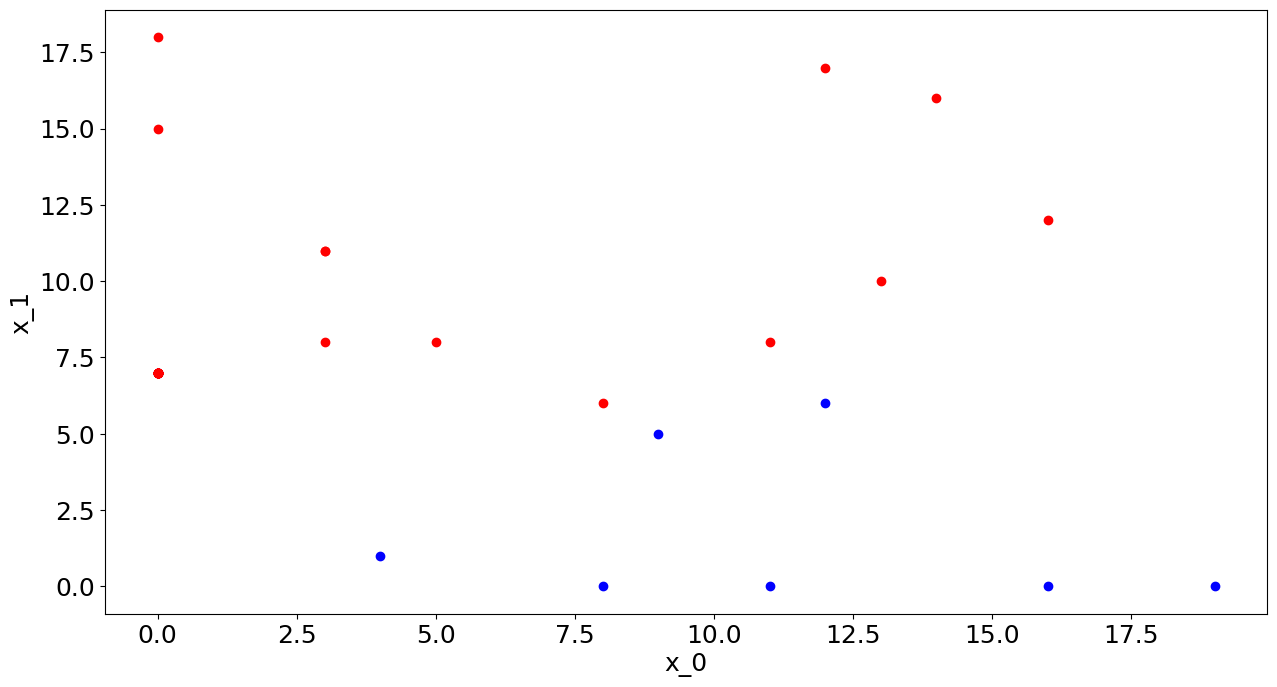

In [6]:
X = np.random.randint(20,size=(20,2))
theta = np.array([[-0.2],[0.3]])
Y = np.round( 1/(1+np.exp(np.dot(-X, theta))))

for i in range(len(Y)):
    print('przykład %2d: x = (%2d,%2d), y = %d '%(i, X[i,0],X[i,1], Y[i]))

ind0 = np.where(Y==0)
ind1 = np.where(Y==1)
plt.plot(X[ind0,0],X[ind0,1],'bo') 
plt.plot(X[ind1,0],X[ind1,1],'ro')
plt.xlabel("x_0")
plt.ylabel("x_1")
plt.show()

## Hipoteza
* Na chwilę zapomiamy, że zbiór wartości jest dyskretny. 
* Na hipotezę wybieramy:

$g(s) = \frac{1}{1+ \exp(-s)}$

która wraz z parametrami $\theta$ i wejściami $x$ jest postaci:

$h_\theta(x) = g(\theta^T x) =  \frac{1}{1+ \exp(-\theta^T x)}$

Pod koniec wykładu okaże się dlaczego taki akurat wybór hipotezy jest bardzo naturalny.

## Jak wygląda funkcja sigmoidalna?


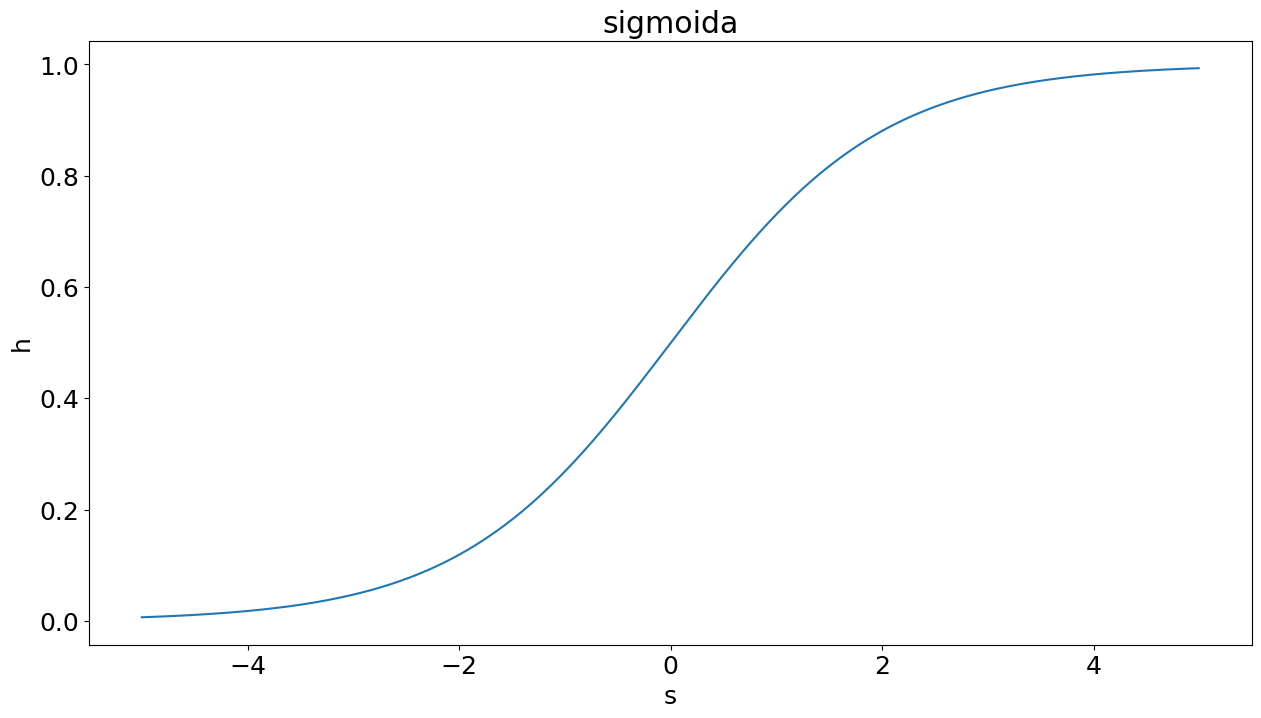

In [20]:
s = np.arange( -5, 5, 0.01)
h = 1/(1 + np.exp(-s))
plt.plot(s,h)
plt.xlabel("s")
plt.ylabel("h")
plt.title("sigmoida")
plt.show()

* Zwróćmy uwagę na zbiór wartości 
* i na gradient tej funkcji

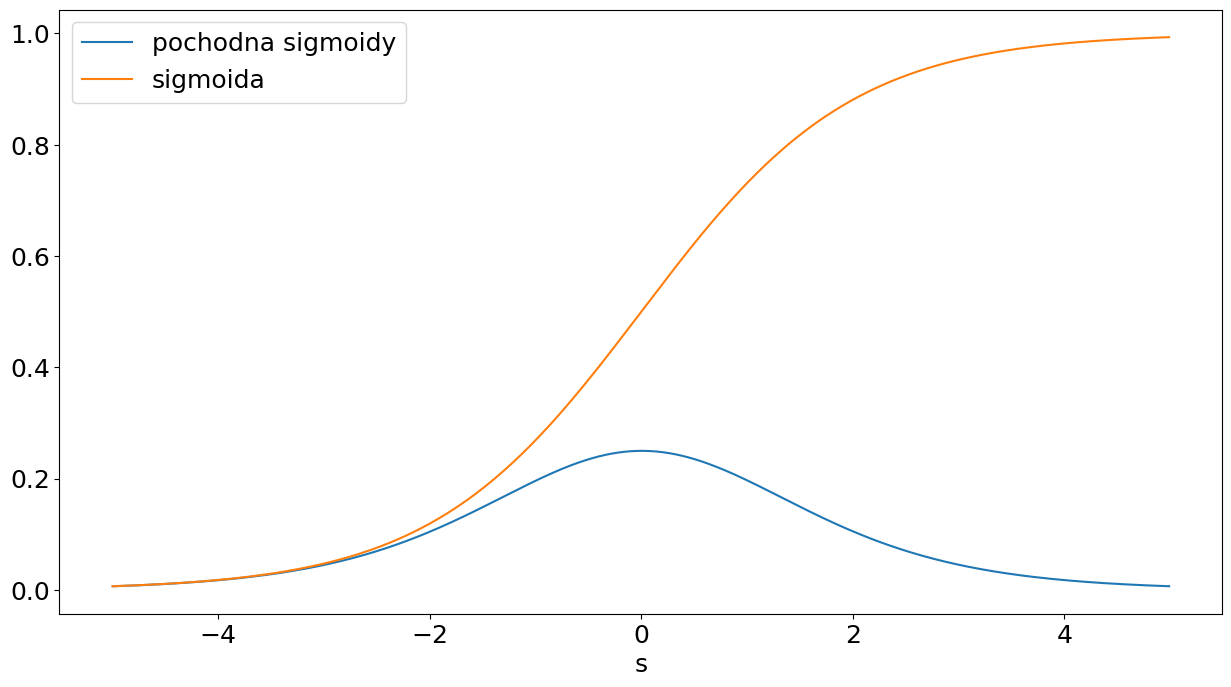

In [21]:
plt.plot(s[1:],np.diff(h)/np.diff(s), s,h)
plt.legend(("pochodna sigmoidy","sigmoida"),loc='upper left')
plt.xlabel("s")
plt.show()

Gdzie są parametry tego modelu?
$$h_\theta(x) = g(\theta^T x) =  \frac{1}{1+ \exp(-\theta^T x)}$$

- zwróćmy uwagę na wyrażenie $-\theta^T x$ - to że jest ono argumentem exp nie jest czysto przypadkowe!

# Hiperpowierzchnia podejmowania decyzji w regresji logistycznej

Ma ona równanie 

$\qquad$ $h_\theta(x)=1/2$, 

tzn:

$\qquad$ $\theta^T x = 0$

Przykładowo dla dwuwymiarowej przestrzeni cech, równanie pewnej prostej:

$\theta_0 +\theta_1 x_1 + \theta_2 x_2 =0 $

Przekształcając to do równania prostej we współrzędnych $(x_1,x_2)$ mamy:

$- \theta_2 x_2 = \theta_0 +\theta_1 x_1 $

$ x_2 = - \frac{1}{\theta_2}( \theta_0 +\theta_1 x_1 )$

Zobaczmy jak to wygląda dla naszego dwuwymiarowego przykładu

In [7]:
import sklearn

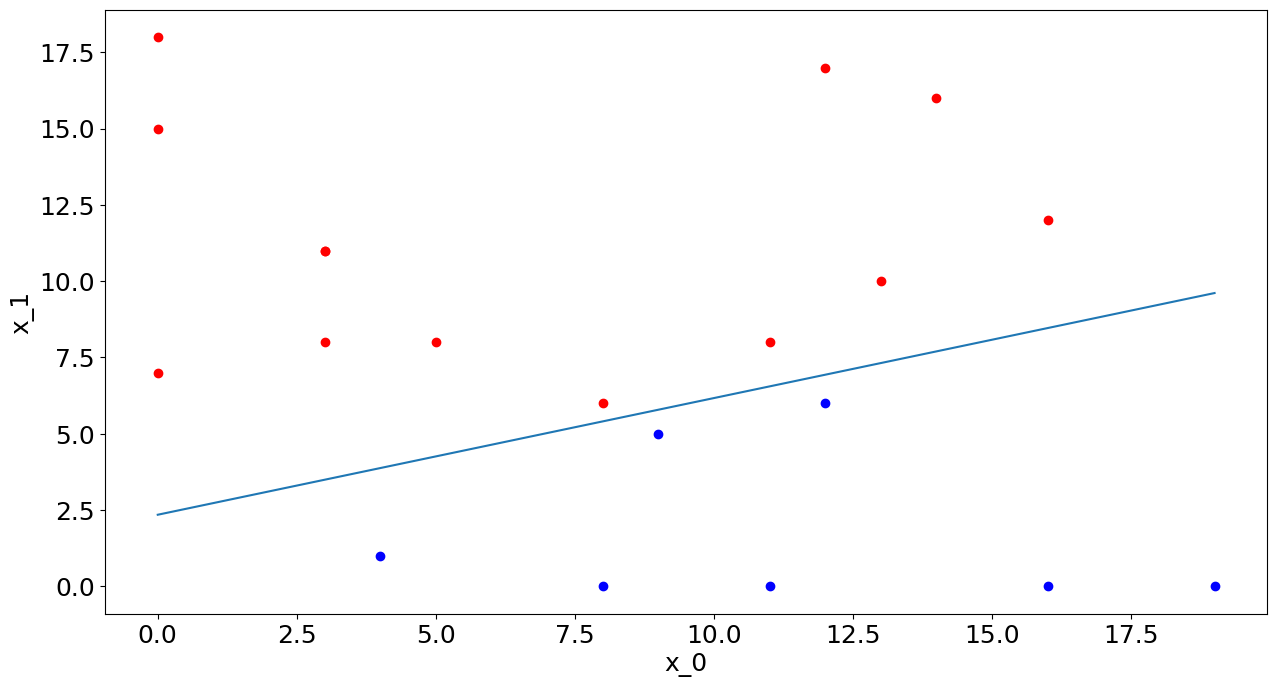

In [9]:
from sklearn.linear_model import LogisticRegression
Y = Y.ravel()
#fitujemy model
clf = LogisticRegression(solver='lbfgs')
clf.fit(X, Y)

# wydobywamy dopasowane parametry
theta_0 = clf.intercept_
theta_1 = clf.coef_[0,0]
theta_2 = clf.coef_[0,1]

# rysujemy granicę decyzji
x1 = np.arange(0,20,1)
x2 = - theta_1/theta_2*x1 - theta_0/theta_2
plt.plot(x1,x2)

# dorysowujemy przykłady z ciągu uczącego
ind0 = np.where(Y==0)
ind1 = np.where(Y==1)
plt.plot(X[ind0,0],X[ind0,1],'bo') 
plt.plot(X[ind1,0],X[ind1,1],'ro')
plt.xlabel("x_0")
plt.ylabel("x_1")
plt.show()

Z nauczonego modelu możemy korzystać do klasyfikacji nowych przykładów:

In [10]:
input = np.array([5,10]).reshape(1,2)
print(clf.predict(input))

[1.]


Możemy też szacować prawdopodobieństwo przynależności do klas [0 albo 1]:

In [11]:
print(clf.predict_proba(input))

[[0.00142934 0.99857066]]


## Quiz:
Jaką hipotezę wybraliśmy dla regresji logistycznej?

## Estymacja parametrów
* Jak znaleźć parametry $\theta$?
* W języku funkcji kosztu  moglibyśmy oczywiście zapostulować odpowiednią funkcję kosztu i zastosować do niej minimalizację gradientową. 
* Poniżej pokażemy, że algorytm można też wyprowadzić z interpretacji probabilistycznej. 
* Dzięki temu będziemy mogli nabrać nowego wglądu w proces doboru parametrów. 

Ponieważ sigmoida ma zbiór wartości $(0,1)$ to można jej wartość traktować jako prawdopodobieństwo jednej z klas (np. klasa $y=1$):

* $P(y=1|x;\theta) = h_\theta(x)  $

Zauważmy, że wtedy:

* $P(y=0|x;\theta) = 1- h_\theta(x) $

Zauważmy ponadto, że powyższe wyrażenia można zapisać w zwartej formie:
$ P(y|x;\theta) = \left(h_\theta(x)\right)^y \left(1-h_\theta(x)\right)^{1-y}$ 

# Funkcja wiarygodności
Zakładając, że przykłady zbioru uczącego są niezależne od siebie prawdopodobieństwo zaobserwowania całego zbioru uczącego 

${\left(X^{(j)},Y^{(j)}\right)}_{j=1,\dots,m}$ wynosi:

$P(Y|X;\theta) = \prod_{j=1}^m P(y^{(j)}|x^{(j)};\theta)$

Możemy to prawdopodobieństwo potraktować jako funkcję parametrów $\theta$, nazywamy ją wówczas _funkcją wiarygodności_  i oznaczamy $L(\theta)$.

$L(\theta)= \prod_{j=1}^m P(y^{(j)}|x^{(j)};\theta) = 
\prod_{j=1}^m \left(h_\theta(x^{(j)})\right)
^{y^{(j)}} \left(1-h_\theta(x^{(j)})\right)^{1-y^{(j)}}$

## Funkcja log-wiarygodności
Łatwiejsza w posługiwaniu się jest funkcja log-wiarygodności:

$l(\theta) = \log L(\theta) = \sum_{j=1}^m y^{(j)} \log h_{\theta}(x^{(j)}) + (1 - y^{(j)}) \log (1 - h_{\theta}(x^{(j)}))$

## Quiz
Co to jest funkcja wiarygodności?

## Zasada największej wiarygodności
**Dobre parametry $\theta$ to te, dla których zaobserwowanie ciągu uczącego jest największe.** Aby je znaleźć należy zmaksymalizować funkcję wiarygodności, czy też dowolną monotonicznie rosnącą funkcję funkcji wiarygodności np. log-wiarygodność. Robimy to modyfikując parametry zgodnie z jej pochodną:

$l(\theta) = \log L(\theta) = \sum_{j=1}^m y^{(j)} \log h_{\theta}(x^{(j)}) + (1 - y^{(j)}) \log (1 - h_{\theta}(x^{(j)}))$

$
\begin{array}{lcl}
\frac{\partial}{\partial \theta_i} l(\theta) &=&  \sum_{j=1}^m\left(y^{(j)}\frac{1}{g(\theta^T x^{(j)})} - (1-y^{(j)})\frac{1}{1-g(\theta^Tx^{(j)})} \right) \frac{\partial}{\partial \theta_i} g(\theta^T x^{(j)})\\
&=& \sum_{j=1}^m \left(y^{(j)}\frac{1}{g(\theta^T x^{(j)})} - (1-y^{(j)})\frac{1}{1-g(\theta^Tx^{(j)})} \right) g(\theta^T x^{(j)})(1-g(\theta^T x^{(j)})) \frac{\partial}{\partial \theta_i} (\theta^T x^{(j)})\\
&=& \sum_{j=1}^m \left( y^{(j)} (1-g(\theta^T x^{(j)})) - (1-y^{(j)})g(\theta^T x^{(j)})\right)x_i^{(j)}\\
&=& \sum_{j=1}^m (y^{(j)}-h_\theta(x^{(j)}))x_i^{(j)}
\end{array}
$

skorzystaliśmy po drodze z postaci pochodnej funkcji logistycznej.

Zatem aby zwiększać funkcję wiarygodności powinniśmy parametry zmieniać zgodnie z obliczoną pochodną:

$\theta_i^{(j+1)} :=\theta_i^{(j)} + \alpha \sum_{j=1}^m (y^{(j)} - h_\theta( x^{(j)}) )x_i^{(j)} $

czyli: 

$\theta_i^{(j+1)} :=\theta_i^{(j)} - \alpha \sum_{j=1}^m (h_\theta( x^{(j)}) -y^{(j)} )x_i^{(j)} $
 
Może to się wydać dziwne, ale startując z zupełnie innych założeń i stosując optymalizację innej funkcji dostaliśmy taką samą regułę zmiany parametrów jak przy gradientowej minimalizacji funkcji (średniokwadratowej) kosztu.

# Rodzina rozkładów wykładniczych  a uogólnione modele liniowe 
Załóżmy, że chcemy zbudować model służący do szacowania  liczby $y$ klientów odwiedzających sklep (lub witrynę) w dowolnej godzinie, na podstawie pewnych cech $x$, takich jak promocje, ostatnie reklamy, prognoza pogody, dzień tygodnia, itd. 

Wiemy, że rozkład Poissona zwykle daje dobry model zliczeń np. liczby odwiedzających. 

Wiedząc o tym, jak możemy wymyślić model dla naszego problemu? 

Na szczęście, rozkład Poissona należy do *rodziny rozkładów wykładniczych*, więc możemy zastosować uogólniony model liniowy (GLM). 

W tej sekcji opiszemy metodę konstruowania modeli GLM.

# Rodzina wykładnicza
Mówimy, że dany rozkład należy do rodziny wykładniczej jeśli da się go zapisać w postaci:

$\qquad p(y;\eta) = b(y) \exp(\eta^T T(y) - a(\eta))$ (*)

tutaj:
* $\eta$ nazywana jest parametrem naturalnym lub kanonicznym dystrybucji; 
* $T(y)$ jest tzw. statystyką wystarczającą (często $T(y) = y$); 
*  wielkość $\exp(-a(\eta))$ jest czynnikiem normalizującym, takim aby rozkład $p(y;\eta)$ sumował/całkował się do 1.
Tak więc członka rodziny wykładniczej określamy podając konkretne postaci $\eta,\, T(y),\, a(\eta)\, \text{oraz} \, b(y)$.

## Uogólnione modele liniowe
Dotychczas rozważaliśmy przykłady regresji gdzie zwykle (rozkład normalny)

$\qquad y \in \mathcal{N}(\mu,\sigma^2)$ 

oraz klasyfikacji gdzie 

$\qquad y \in \text{Bernoulli}(\phi)$.


Wkrótce przekonamy się, że oba te problemy sa szczególnymi przypadkami większej rodziny modeli, tzw. uogólnionych modeli liniowych.

### Uwaga: 
* W podejściu probabilistycznym myślimy sobie, że zmienna zależna $y$ pochodzi z jakiegoś rozkładu prawdopodobieństwa.
* Będziemy często mówić, że **modelujemy** zmienną $y$ za pomocą rozkładu ...


## Rozkład Gaussa 
Rozważymy rozkład  Gaussa. Do estymacji parametrów regresji liniowej nie musieliśmy używać jego wariancji, więc dla uproszczenia obliczeń przyjmiemy, że nasz rozkład Gaussa ma wariancję $\sigma^2 = 1$.
Mamy:

$ 
\begin{array}{lcl}
p(y;\mu) &=& \frac{1}{\sqrt{2 \pi}} \exp\left( -\frac{1}{2} (y-\mu)^2\right)\\
&=& \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{1}{2}y^2 \right) \exp\left(\mu y - \frac{1}{2}\mu^2 \right)
\end{array}
$

Widzimy więc, że rozkład Gaussa należy do rodziny wykładniczej z następującymi parametrami:

$
\begin{array}{lcl}
\eta &=& \mu \\
T(y) &=& y \\
a(\eta) &=& \mu^2/2 = \eta^2/2 \\
b(y) &=& \frac{1}{\sqrt{2 \pi}} \exp\left( -\frac{1}{2} y^2\right)
\end{array}
$

## Rozkład Bernouliego 
Pokażemy teraz, że rozkład Bernouliego należy do rodziny wykładniczej. 

Przypomnijmy, że: 

$\text{Bernouli}(\phi)$ to taki rozkład wartości $y \in \{0,1\}$, że:

$p(y=1;\phi) = \phi$ 

$p(y=0;\phi) = 1-\phi$. 

W sposób zwarty możemy napisać ten rozkład tak:

$ 
\begin{array}{lcl}
p(y;\phi) &=& \phi^y(1-\phi)^{1-y} \\
&=& \exp(y \log \phi + (1-y) \log (1-\phi))\\
&=& \exp\left( y \log \frac{\phi}{1-\phi} + \log(1-\phi)\right)
\end{array}
$ 

Zatem w rozkładzie Bernouliego parametrem naturalnym jest

$ \eta = \log \frac{\phi}{1-\phi}$.

Warto zauważyć, że jeśli przekształcić to wyrażenie ze względu na $\phi$ to dostaniemy dobrze znaną funkcję logistyczną: 

$\qquad \phi = \frac{1}{1+\exp(-\eta)}$.

Widzimy też, że:
* $T(y) = y$
* $a(\eta) = -\log(1-\phi) = \log (1+exp(\eta))$
* $b(y) = 1$

Czyli możemy przedstawić ten rozkład w postaci (*).

Rodzina wykładnicza jest znacznie bogatsza. Zawiera w sobie rozkłady wielorakie, Poissona (do modelowania zliczeń), gamma i wykładnicze (np. interwałów czasowych) i wiele innych. W kolejnej sekcji podamy ogólny sposób na konstruowanie modeli, w których $y$ pochodzi z rozkładów wykładniczych.

## Quiz
Jak pokazać, że dany rozkład należy do rodziny rozkładów wykładniczych?

$\qquad p(y;\eta) = b(y) \exp(\eta^T T(y) - a(\eta))$ 

## Konstrukcja uogólnionego modelu liniowego
W ogólności chcielibyśmy przewidywać wartość zmiennej losowej  $y$ traktując ją jako funkcję zmiennej $x$. Aby móc zastosować tu metodologię GLM musimy poczynić następujące założenia:
* Poszukiwana funkcja zależy od parametrów $\theta$

1) Zmienna $y$ przy ustalonych $x$  i $\theta$ podlega pewnemu rozkładowi wykładniczemu z parametrem $\eta$ tzn.:

$\qquad(y|x;\theta) \sim$ RodzinaWykładnicza($\eta$). 

2) Postulujemy, że hipoteza ma postać:

$\qquad h(x)= E[T(y)|x]$
* często $T(y) = y$, wtedy  $h(x)= E[y|x]$

3) Parametr naturalny $\eta$ jest **liniowo związany z wejściem** $x$: 

$\qquad\eta = \theta^T x$.

Te trzy założenia pozwalają wyprowadzić klasę algorytmów uczących opartych o GLM. Poniżej przedstawimy trzy przykłady.

## Hipoteza dla regresji liniowej z GLM
* Przekonajmy się, że regresja liniowa jest szczególnym przykładem GLM.
* Zmienna zależna $y$ jest ciągła i jej prawdopodobieństwo warunkowe dla danego $x$ jest modelowane przez rozkład Gaussa $N(\mu,\sigma)$ ($\mu$ może zależeć od $x$). 

* Tak więc w tym wypadku wspomnianą w założeniu 1) RodzinąWykładniczą jest rozkład Gaussa. 

* Tak jak widzieliśmy  w tym przypadku $\eta = \mu$. 

* Dalej mamy:

$
\begin{array}{lcl}
h_\theta(x) &=& E[y|x;\theta]\\
&=& \mu \\
&=& \eta \\
&=& \theta^T x
\end{array}
$

* pierwsza równość wynika z założenia 2, 
* druga równość wynika z tego, że $(y|x;\theta) \sim N(\mu,\sigma^2)$, tak więc wartość oczekiwana wynosi $\mu$
* trzecia równość wynika z założenia 1
* ostatnia równość wynika  z założenia 3

Zauważmy jak przyjęcie założeń co do postaci rozkładu zmiennej zależnej i metodologi GLM (trzy założenia) prowadzą do konkretnej postaci hipotezy.

## Hipoteza dla regresji logistycznej z GLM
* Interesuje nas tutaj klasyfikacja binarna, więc $y \in \{0,1\}$. 

* Ponieważ $y$ przyjmuje wartości binarne to naturalnym rozkładem prawdopodobieństwa do modelowania warunkowego rozkładu $(y|x)$ jest rozkład Bernoulliego z parametrem $\phi$ 
$(\phi$ jest prawdopodbieństwem tego, że $y=1)$. 

* Rozkład ten należy do rodziny RozkładówWykładniczych 

* Dalej zauważmy, że jeśli $(y|x;\theta) \sim \text{Bernoulli}(\phi)$, to $E[y|x;\theta] = \phi$, 

* $\phi = \frac{1}{1+\exp(-\eta)}$. 

więc analogicznie jak dla regresji liniowej mamy:
$\qquad
\begin{array}{lcl}
h_\theta(x) &=& E[y|x;\theta]\\
&=& \phi \\
&=& \frac{1}{1+\exp(-\eta)} \\
&=& \frac{1}{1+\exp(-\theta^T x)}
\end{array}
$

Otrzymaliśmy więc funkcję hipotezy w postaci 

$\qquad h_\theta(x) = \frac{1}{1+\exp(-\theta^T x)}$. 

To jest wytłumaczenie dlaczego stosuje się funkcje logistyczne w problemach klasyfikacji: jak tylko założymy, że zmienna zależna podlega rozkładowi Bernoulliego to funkcja logistyczna jest konsekwencją definicji uogólnionych modeli liniowych i rodziny rozkładów wykładniczych.

## Regresja wieloraka (softmax)

Problem polega na przydzieleniu zmiennych niezależnych do jednej z _k_ klas, czyli zmienna zależna nadal jest dyskretna, ale może przyjmować jedną z _k_ wartości: $y \in \{1,2,\dots,k\}$. Mówimy, że zmienne _y_ podlegają rozkładowi **wielorakiemu** (ang. $multinomial$).

### Przykład 1

Rozpoznawanie ręcznie pisanych cyfr: na wejściu mamy obrazek (pixle -> wektor liczb odpowiadających skali szarości danego miejsca), na wyjściu chcemy jedną z klas 0, 1, ..., 9


### Przykład 2

![Klasyczny zbiór danych o irysach: ](Iris_dataset_scatterplot.svg.png "Klasyczny zbiór danych o irysach")
> Autor: Nicoguaro (Praca własna) [CC BY 4.0 (http://creativecommons.org/licenses/by/4.0)], Wikimedia Commons]"

<figure>
<img src="https://www.pngkey.com/png/detail/82-826789_iris-iris-sepal-and-petal.png" alt="Iris - Iris Sepal And Petal@pngkey.com">
</figure>
    

## Rozkład wieloraki należy do rodziny rozkładów wykładniczych
* Wyprowadzimy teraz metodę modelowania takich wielorakich danych. 
* Zaczniemy od wyrażenia rozkładu wielorakiego jako rozkładu należącego do rodziny rozkładów wykładniczych.

### Parametryzacja
* Aby sparametryzować wielorakość z _k_ możliwymi wynikami, można by zacząć od _k_ parametrów $\phi_1,\dots,\phi_k$ określających prawdopodobieństwo każdego z wyników. 
* Taka parametryzacja jest redundantna, tzn. parametry te nie są niezależne 

> Dlaczego?

* bo znając $k-1$ spośród $\phi_i$ parametrów ostatni, $k$-ty, parametr jest jednoznacznie określony, bo musi być spełniona równość $\sum_{i=1}^k \phi_i =1$.) Tak więc sparametryzujemy rozkład przez $k-1$ parametrów:

$\qquad$ $\phi_1,\dots,\phi_{k-1}$, 

gdzie:

$\qquad$ $\phi_i = p(y=i;\phi)$ 

$\qquad$ $p(y=k;\phi) = 1 - \sum_{i=1}^{k-1} \phi_i$. 

Dla wygody notacji zapiszemy, że 

$\qquad$ $\phi_k = 1-\sum_{i=1}^{k-1} \phi_i$, 

ale będziemy pamiętać, że to nie jest parametr, i że nasz rozkład wieloraki jest w pełni określony przez parametry: 

$\qquad$ $\phi_1,\dots,\phi_{k-1}$.

### Definicja statystyki wystarczającej: $T(y)$
Aby wyrazić rozkład wieloraki w języku rodziny rozkładów wykładniczych zdefiniujmy $T(y) \in \mathcal{R}^{k-1}$ w następujący sposób:

$
T(1) = \left[
\begin{array}{c}
1\\
0\\
0\\
\vdots\\
0
\end{array}
 \right],
T(2) = \left[
\begin{array}{c}
0\\
1\\
0\\
\vdots\\
0
\end{array}
 \right],\dots,
T(k-1) = \left[
\begin{array}{c}
0\\
0\\
0\\
\vdots\\
1
\end{array}
 \right], 
T(k) = \left[
\begin{array}{c}
0\\
0\\
0\\
\vdots\\
0
\end{array}
 \right]
$

W odróżnieniu od poprzednich przykładów **nie mamy** tu $T(y) = y$, ale $T(y)$ **jest $k-1$ wymiarowym wektorem** a nie skalarem. Aby oznaczyć $i$-ty element tego wektora będziemy pisać $(T(y))_i$. 

I jeszcze jedna użyteczna konwencja. Wprowadźmy funkcję $1\{\cdot\}$, przyjmuje ona wartość 1 gdy jej argument jest prawdziwy i 0 gdy jest fałszywy, np.: $1\{2==3\} = 0$ zaś $1\{3==7-4\} = 1$.

* Tak więc 

$\qquad$ $(T(y))_i = 1\{y==i\}$. 
* Dalej mamy (wartość oczekiwana)

$\qquad$ $E[(T(y))_i] = P(y=i) = \phi_i$. 

Zauważmy, że notacja $1\{ a==b\}$ jest bardzo naturalna dla `pythona`

In [26]:
print(2==3)
print(3==7-4)
   
 
print(np.sum(3==7-4))



False
True
1


* Na funkcję $T(y)$ możemy też patrzeć jak na funkcję wykonującą specyficzne kodowanie przynależności do klasy.
* Klasa  $k$ kodowana jest przez wektor samych zer, a każda inna przez umieszczenie $1$ na współrzędnej odpowiadającej numerowi klasy. 
* Możemy sobie wyobrazić, że taka funkcja steruje diodami, aby poinformować nas o wyniku podłączonego do niej klasyfikatora:
![alt wskaznik](wskaznik.jpg " ")

### Sprowadzamy rozkład wieloraki do postaci  rozkładu wykładniczego

$p(y;\phi) = \phi_1^{1\{y==1\}}\phi_2^{1\{y==2\}} \dots \phi_k^{1\{y==k\}}$  $\qquad$ Tu funkcję $1\{\cdot\}$ zastosowaliśmy jako "włącznik" dla konkretnego $\phi$

$\qquad = \phi_1^{1\{y==1\}}\phi_2^{1\{y==2\}} \dots \phi_k^{1-\sum_{i=1}^{k-1}1\{y==i\}}$

$\qquad = \phi_1^{(T(y))_1}\phi_2^{(T(y))_2}\dots\phi_k^{1-\sum_{i=1}^{k-1}(T(y))_i}$

$\qquad = \exp\left[ (T(y)_1\log(\phi_1)) + (T(y)_2\log(\phi_2)) + \dots + (1-\sum_{i=1}^{k-1} (T(y))_i)\log(\phi_k)\right]$

$\qquad = \exp \left[ (T(y))_1 \log \frac{\phi_1}{\phi_k} + (T(y))_2 \log \frac{\phi_2}{\phi_k} + \dots + (T(y))_{k-1} \log \frac{\phi_{k-1}}{\phi_k} + \log(\phi_k)\right]$

$\qquad = b(y) \exp(\eta^T T(y) - a(\eta))$

gdzie:

$
\begin{array}{lcl}
   \eta &=& 
       \left[
            \begin{array}{c}
                \log \frac{\phi_1}{\phi_k}\\
                \log \frac{\phi_2}{\phi_k}\\
                \vdots \\
                \log \frac{\phi_{k-1}}{\phi_k}
            \end{array} 
      \right]\\
    a(\eta)&=& -\log(\phi_k) \\
    b(y) &=& 1
\end{array} 
$

To kończy prezentację rozkładu wielorakiego jako członka rodziny rozkładów wykładniczych.

### Hipoteza dla rozkładu wielorakiego z GLM.
Funkcja łącząca (dla $i = 1,\dots,k$) dana jest przez:

$\qquad\eta_i = \log \frac{\phi_i}{\phi_k}$
dla wygody zdefiniowaliśmy także $\eta_k = \log \frac{\phi_k}{\phi_k}$
Stąd mamy:

$\qquad\exp(\eta_i) = \frac{\phi_i}{\phi_k}$ 

$\qquad \phi_k \exp(\eta_i) = \phi_i \qquad $(**)

Suma po wszystkich możliwych zdarzeniach daje zdarzenie pewne:

$\qquad \phi_k \sum_{i=1}^{k} \exp(\eta_i) = \sum_{i=1}^k \phi_i = 1$

Stąd:

$\qquad \phi_k = \frac{1}{ \sum_{i=1}^{k} \exp(\eta_i)}$

Podstawiając to wyrażenie do (**) otrzymujemy funkcję odpowiedzi postaci:

$\qquad \phi_i = \frac{\exp(\eta_i)}{\sum_{j=1}^k \exp(\eta_j)}$

Ta funkcja mapująca $\eta$ na $\phi$ nazywa się funkcją **softmax**. 

Aby dokończyć formulację modelu użyjemy założenia 3, że $\eta$ jest liniowo związana ze zmienną niezależną $x$. Tak więc mamy:

$\qquad \eta_i = \theta_i^T x$ dla $i = 1, \dots,k-1$ gdzie $\theta$ to parametry modelu. 

Dla wygody notacji definiujemy $\theta_k = 0$. Wynika stąd, że $\eta_k = \theta_k^T x = 0$. 

Zatem model nasz zakłada, że rozkład warunkowy $(y|x)$ dany jest przez:

$\qquad$
$
\begin{array}{lcl}
p(y=i|x;\theta) &=& \phi_i  \\
&=&\frac{\exp(\eta_i)}{\sum_{j=1}^k \exp(\eta_j)}  \\
                &=& \frac{\exp(\theta_i^T x)}{\sum_{j=1}^k \exp(\theta_j^T x)}
\end{array}             
$

W wyprowadzonym powyżej modelu regresji softmax hipoteza ma postać:

$
\begin{array}{lcl}
h_\theta(x) &=& E[T(y)|x;\theta]\\
            &=& E \left[
                  \begin{array}{lcl}
                        1\{y==1\} &|& \\
                        1\{y==2\} &|& \\
                         \vdots   &|& \\
                        1\{y==k-1\} &|&
                  \end{array} x;\theta
                 \right]\\
           &=& \left[
                  \begin{array}{l}
                        \phi_1 \\
                        \phi_2 \\
                        \vdots \\
                        \phi_{k-1}                  
                  \end{array} 
                 \right]\\
\end{array}
$

$\qquad
\begin{array}{lcl}
          &=& \left[
                  \begin{array}{l}
                        \frac {\exp(\theta_1^T x)}{\sum_{j=1}^k \exp(\theta_j^T x)}\\
                        \frac {\exp(\theta_2^T x)}{\sum_{j=1}^k \exp(\theta_j^T x)} \\
                        \vdots \\
                        \frac {\exp(\theta_{k-1}^T x)}{\sum_{j=1}^k \exp(\theta_j^T x)}                  
                  \end{array} 
                 \right]
\end{array}
$

Wyrażając to słowami: nasza hipoteza zwróci prawdopodobieństwo warunkowe przynależności danego $x$ do każdej z klas $i$:

$\qquad p(y=i|x;\theta) $ dla $i = 1, \dots,k$, 

przy czym prawdopodobieństwo przynależności do ostatniej klasy dane jest przez: 

$\qquad p(y=k|x;\theta) = 1-\sum_{j=1}^{k-1} \phi_j$.

## Estymacja parametrów modelu wielorakiego
Na koniec zastanówmy się jak estymować parametry tego modelu. Podobnie jak w przypadku regresji liniowej i regresji logistycznej potrzebny jest nam zbiór uczący postaci $\left\{(x^{(j)},y^{(j)})\right\}_{ j =1,\dots,m }$. Można ponownie skorzystać z zasady największej wiarygodności i wyznaczyć parametry $\theta$, które maksymalizują prawdopodobieństwo zaobserwowania całego zbioru uczącego. 

### Funkcja log-wiarygodności ma postać:

$\qquad
\begin{array}{lcl}
l(\theta) &=& \sum_{j=1}^m \log p(y{(j)}|x^{(j)};\theta) \\
&=& \sum_{j=1}^m \log \prod_{i=1}^k \left( \frac{\exp(\theta_i^T x^{(j)} )}{\sum_{n=1}^k \exp (\theta_n^T x^{(j)})} \right)^{1\{y^{(j)}==i\}} 
\\
&=& \sum_{j=1}^m \sum_{i=1}^k \log \left( \frac{\exp(\theta_i^T x^{(j)} )}{\sum_{n=1}^k \exp (\theta_n^T x^{(j)})} \right)^{1\{y^{(j)}==i\}}
\end{array}
$

### Zasada największej wiarygodności
Teraz maksymalizację $l(\theta)$ można przeprowadzić np. za pomocą algorytmu gradientowego (tzn. zmieniamy iteracyjnie parametry  w kierunku zgodnym z gradientem funkcji log-wiarygodności).

## Quiz
Jak znaleźć hipotezę dla danych modelowanych przez pewien znany rozkład w oparciu o GLM?


Funkcja log-wiarygodności a funkcja straty entropii krzyżowej (cross-entropy loss)?

-  funkcja straty entropii krzyżowej może być interpretowana jako minus funkcja log-wiarygodności
w zapisie $H(y_{ture},y_{predict}) = - \sum_{j=1}^m  \sum_{i=1}^k y_{true, i}^{(j)}\log(y_{pred,i})^{(j)} $

przy czym zakłada sie w tej notacji kodowanie $y_{true}$ typu "one-hot" - działa jak nasz włącznik z $1\{y^{(j)}==i\}$; $y_{pred}$ to prawdopodobieństwo klasy zwracane przez softmax
 
https://datascience.stackexchange.com/questions/9302/the-cross-entropy-error-function-in-neural-networks